In [38]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


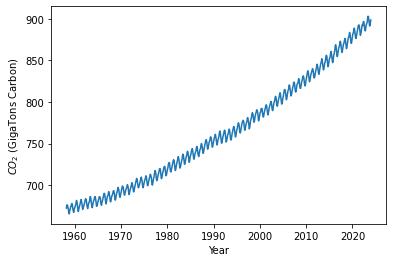

In [39]:
filename='../Data/co2_mm_mlo.txt'
day=np.loadtxt(filename).T[2]
co2=np.loadtxt(filename).T[3]
gtc=2.13 # global tons of carbon for 1 ppm
plt.plot(day,co2*gtc)
plt.xlabel('Year')
plt.ylabel('$CO_2$ (GigaTons Carbon)')
plt.savefig('../Figures/co2atm.png')

In [40]:
co2g=co2*gtc
print(co2g[-1])

898.5618


Text(0, 0.5, '$CO_2$ (GigaTons Carbon)')

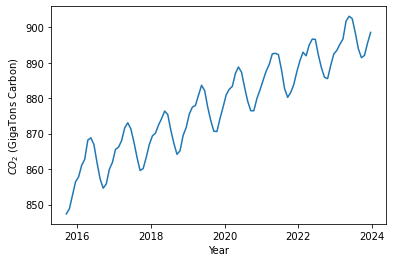

In [41]:
plt.plot(day[-100:],co2[-100:]*gtc)
plt.xlabel('Year')
plt.ylabel('$CO_2$ (GigaTons Carbon)')

There is more CO2 in the atmosphere in Northern Spring and less in the Fall. This reflects the fact that throughout the winter the plants are decaying and returing CO2 to the atmosphere. Then in the Spring, the plants start recapturing the CO2 to grow so that by Fall the atmospheric CO2 is a minimum.

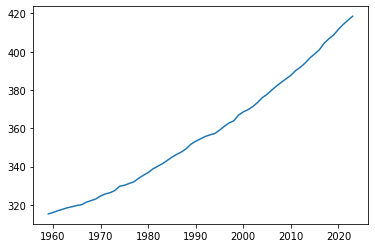

In [42]:
## Get the mean co2 in a given year
cyear=[]
for d in day:
    cyear.append(np.floor(d))
oldy=0.
year=[]
coy=[]
co=0.
for i,y in enumerate(cyear):
   if (y==oldy): 
       co+=co2[i]
       n+=1
   else:
       oldy=y
       if i > 0:
        year.append(y)
        coy.append(co/n)
       n=1
       co=co2[i]
plt.plot(year,coy)

In [43]:
%pwd


'/Users/scottdodelson/CMU/Courses/Energy/Code'

In [44]:
co2=pd.read_csv('../Data/co2-data/owid-co2-data (1).csv')
temperature_year=np.loadtxt('../Data/temperatures.txt').T[0]
temperature=np.loadtxt('../Data/temperatures.txt').T[1]
tnew_year=np.loadtxt('../Data/GLB.Ts+dSST_truncated.txt').T[0]
tnew=np.loadtxt('../Data/GLB.Ts+dSST_truncated.txt').T[1]/100.

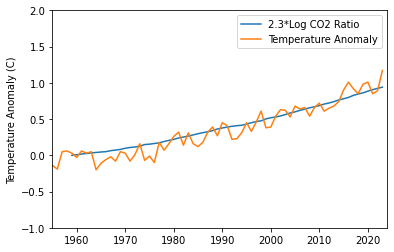

In [45]:
n=np.size(year)

plt.plot(year,2.3*np.log2(coy/coy[0]),label='2.3*Log CO2 Ratio')
#plt.plot(temperature_year,temperature,label='Temperature Anomaly')
plt.plot(tnew_year,tnew,label='Temperature Anomaly')
plt.axis([1955,2024,-1,2])
plt.ylabel('Temperature Anomaly (C)')
plt.legend()
plt.savefig('../Figures/TA_CO2.png')


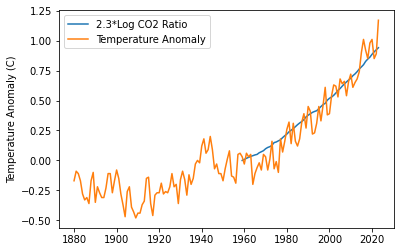

In [46]:
plt.plot(year,2.3*np.log2(coy/coy[0]),label='2.3*Log CO2 Ratio')
#plt.plot(temperature_year,temperature,label='Temperature Anomaly')
plt.plot(tnew_year,tnew,label='Temperature Anomaly')
#plt.axis([1955,2024,-1,2])
plt.ylabel('Temperature Anomaly (C)')
plt.legend()


In [9]:
co2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48058 entries, 0 to 48057
Data columns (total 79 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   country                                    48058 non-null  object 
 1   year                                       48058 non-null  int64  
 2   iso_code                                   39717 non-null  object 
 3   population                                 39495 non-null  float64
 4   gdp                                        14564 non-null  float64
 5   cement_co2                                 23764 non-null  float64
 6   cement_co2_per_capita                      22017 non-null  float64
 7   co2                                        30308 non-null  float64
 8   co2_growth_abs                             28157 non-null  float64
 9   co2_growth_prct                            25136 non-null  float64
 10  co2_including_luc     

In [10]:
co2.head()

,country,year,iso_code,population,gdp,cement_co2,cement_co2_per_capita,co2,co2_growth_abs,co2_growth_prct,...,share_global_other_co2,share_of_temperature_change_from_ghg,temperature_change_from_ch4,temperature_change_from_co2,temperature_change_from_ghg,temperature_change_from_n2o,total_ghg,total_ghg_excluding_lucf,trade_co2,trade_co2_share
0,Afghanistan,1850,AFG,3752993.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,1851,AFG,3767956.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.165,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,Afghanistan,1852,AFG,3783940.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.164,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
3,Afghanistan,1853,AFG,3800954.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.164,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
4,Afghanistan,1854,AFG,3818038.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.163,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN


In [11]:
co2.describe()

,year,population,gdp,cement_co2,cement_co2_per_capita,co2,co2_growth_abs,co2_growth_prct,co2_including_luc,co2_including_luc_growth_abs,...,share_global_other_co2,share_of_temperature_change_from_ghg,temperature_change_from_ch4,temperature_change_from_co2,temperature_change_from_ghg,temperature_change_from_n2o,total_ghg,total_ghg_excluding_lucf,trade_co2,trade_co2_share
count,48058.000000,3.949500e+04,1.456400e+04,23764.000000,22017.000000,30308.000000,28157.000000,25136.000000,23320.000000,23030.000000,...,2593.000000,41724.000000,37620.000000,41724.000000,41724.000000,37620.000000,6354.000000,6354.000000,4398.000000,4397.000000
mean,1926.842565,6.083223e+07,2.677586e+11,9.109400,0.066798,391.272161,5.868310,20.055703,534.225708,7.445587,...,19.199870,2.190116,0.002956,0.006886,0.010069,0.000497,790.430981,759.384745,-7.157874,20.368010
std,59.414846,3.285867e+08,2.103151e+12,66.463548,0.125367,1855.824655,59.845871,687.366449,2164.644277,97.593192,...,33.432368,9.012474,0.016068,0.039698,0.057196,0.002943,3610.534250,3531.641287,269.156220,52.720717
min,1750.000000,2.220000e+02,4.998000e+07,0.000000,0.000000,0.000000,-2032.366000,-100.000000,-187.847000,-2334.695000,...,0.000000,-0.899000,-0.001000,0.000000,-0.001000,0.000000,-186.660000,0.010000,-2367.758000,-99.795000
25%,1883.000000,3.464375e+05,7.516679e+09,0.000000,0.000000,0.183000,0.000000,-0.733500,5.950750,-0.752750,...,0.249000,0.003000,0.000000,-0.000000,0.000000,0.000000,8.450000,7.042500,-3.024750,-6.287000
50%,1930.000000,2.456362e+06,2.597999e+10,0.029000,0.008000,3.856000,0.026000,3.749500,27.777000,0.071000,...,1.431000,0.071000,0.000000,0.000000,0.000000,0.000000,38.285000,30.830000,1.478500,8.741000
75%,1976.000000,1.008038e+07,1.132942e+11,0.834000,0.093000,47.277250,0.873000,10.593500,124.373750,2.568500,...,19.405000,0.329000,0.001000,0.001000,0.001000,0.000000,153.595000,131.512500,9.124000,32.512000
max,2022.000000,7.975105e+09,1.136302e+14,1692.404000,2.574000,37149.785000,1813.064000,102318.508000,41637.617000,2340.859000,...,100.000000,100.000000,0.415000,1.113000,1.611000,0.083000,49880.602000,48089.621000,2187.777000,576.482000


246
54.69000790909091
Africa 38.89818739726027
Bangladesh 28.72156931506849
Pakistan 41.84633095890411
Philippines 49.973779726027395
Sri Lanka 42.88079342465754


Text(0, 0.5, 'Number of Countries')

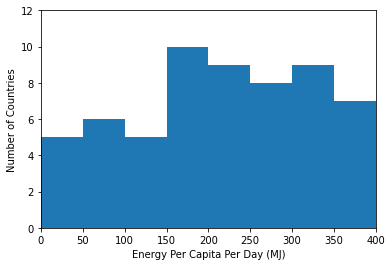

In [12]:
df = co2[co2['country'] != 'World']
df=df[df['year']==2022]
emit=df['co2']
print(np.size(emit))
country=df['country']
print(np.nansum(emit*.001*12./44))
sum=0.
for i in range(246):
   tmp=emit.values[i]*.001*12./44
   if not np.isnan(tmp): sum+=tmp
   #print(country.values[i],sum)
#plt.scatter(country,emit[i]*.001*12./44)
country=df['country']
#pop=df['population']
epc=df['energy_per_capita']
#1 kW-hour=10^3 J *3600=3.6MJ
epd=[]
for i in range(246):
   if not np.isnan(epc.values[i]):
       if (epc.values[i]*3.600/365 <= 50.):
            print(country.values[i],epc.values[i]*3.600/365)
       epd.append(epc.values[i]*3.600/365)
        #print(country.values[i],epc.values[i]*3.600/365)
plt.hist(epd,bins=[0,50,100,150,200,250,300,350,400,2000])
plt.axis([0,400,0,12])
plt.xlabel('Energy Per Capita Per Day (MJ)')
plt.ylabel('Number of Countries')

In [13]:
years = df.iloc[:, 1] 
df = co2[co2['country'] != 'World']
# Convert to Gt
#grouped_c02 = df.groupby(years)['co2_including_luc'].sum() * 0.001
grouped_c02 = df.groupby(years)['co2'].sum() * 0.001*12./44
co2_values = grouped_c02[grouped_c02.index == 2022].values[0]
print(co2_values)

54.690007909090916


In [14]:

worst=co2[co2['co2']>36440.]
print(worst)

      country  year iso_code    population           gdp  cement_co2  \
47534   World  2018      NaN  7.683790e+09  1.136302e+14    1565.803   
47535   World  2019      NaN  7.764951e+09           NaN    1615.776   
47537   World  2021      NaN  7.909295e+09           NaN    1692.404   
47538   World  2022      NaN  7.975105e+09           NaN    1605.474   

       cement_co2_per_capita        co2  co2_growth_abs  co2_growth_prct  ...  \
47534                  0.204  36766.945         741.491            2.058  ...   
47535                  0.208  37040.102         273.158            0.743  ...   
47537                  0.214  36816.543        1808.806            5.167  ...   
47538                  0.201  37149.785         333.242            0.905  ...   

       share_global_other_co2  share_of_temperature_change_from_ghg  \
47534                   100.0                                 100.0   
47535                   100.0                                 100.0   
47537               

In [15]:
co2us=co2[co2['country']=='World']


In [16]:
emit=co2us['co2']
emitcum=co2us['cumulative_co2']
year=np.array(co2us['year'])

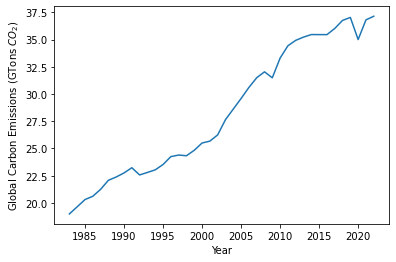

In [17]:
plt.plot(year[-40:],emit[-40:]/1.e3)
plt.xlabel('Year')
plt.ylabel('Global Carbon Emissions (GTons $CO_2$)')
plt.savefig('../Figures/co2gt.png')

Text(0, 0.5, 'Global Carbon Emissions (GTC)')

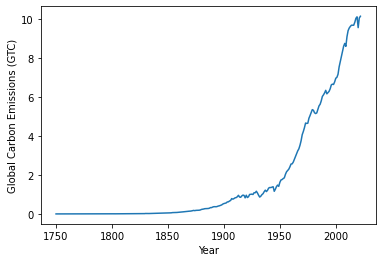

In [18]:
plt.plot(year,emit/3.664/1.e3)
plt.xlabel('Year')
plt.ylabel('Global Carbon Emissions (GTC)')

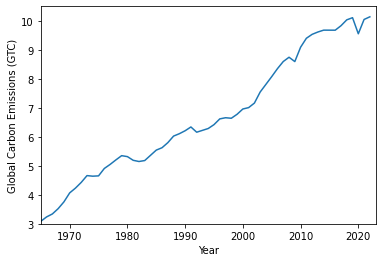

In [19]:
plt.plot(year,emit/3.664/1.e3)
plt.xlabel('Year')
plt.ylabel('Global Carbon Emissions (GTC)')
plt.axis([1965,2023,3,10.5])
plt.savefig('../Figures/co2gr.png')

2022
473.7220911572052


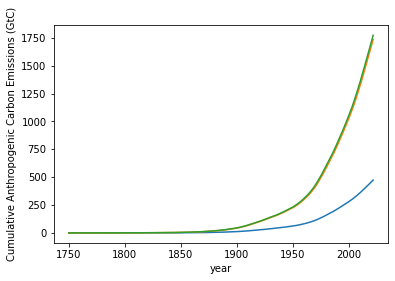

In [20]:
n=np.size(emit)
cum=np.zeros(n)
for i in range(n):
    cum[i]=np.sum(emit[:i])
plt.plot(year,cum/3.664/1.e3)
plt.plot(year,cum/1.e3)
plt.plot(year,emitcum/1.e3)
plt.xlabel('year')
plt.ylabel('Cumulative Anthropogenic Carbon Emissions (GtC)')
print(year[-1])
print(cum[-1]/3.664/1.e3)

21672.818339317946


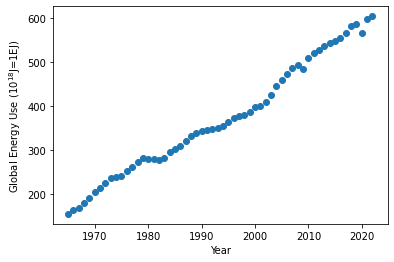

In [21]:
yr=co2us['year']
epc=co2us['energy_per_capita']
population=co2us['population']
energy=epc*population  # in kilowatt-hours
kwhour=3600.*1000. #J
ne=np.size(yr)
sum=np.nansum(epc*population*kwhour/1.e18)
print(sum)
#=co2[co2['country']=='World']
plt.scatter(yr,energy*kwhour/1.e18) #,emissions/1.e3/3.644)
plt.xlabel('Year')
plt.ylabel('Global Energy Use ($10^{18}$J=1EJ)')
plt.savefig('../Figures/ec.png')



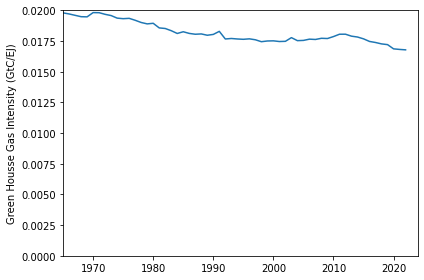

In [22]:
plt.plot(year,emit/3.664/1.e3/(energy*kwhour/1.e18))
plt.ylabel('Green Housse Gas Intensity (GtC/EJ)')
plt.axis([1965,2024,.0,.02])
plt.tight_layout()
plt.savefig('../Figures/ghgi.png')


Text(0, 0.5, 'Emissions (GtC)')

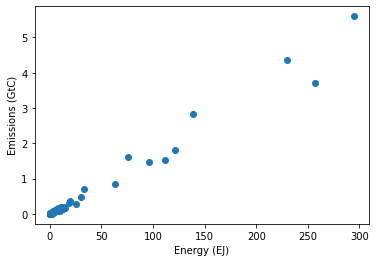

In [23]:
co22019=co2[co2['year']==2018]
co22019=co22019[co22019['country']!='World']
emissions=co22019['co2']
gdp=co22019['gdp']
population=co22019['population']
epc=co22019['energy_per_capita']
energy=epc*population  # in kilowatt-hours
kwhour=3600.*1000. #J
plt.scatter(energy*kwhour/1.e18,emissions/1.e3/3.644)
plt.xlabel('Energy (EJ)')
plt.ylabel('Emissions (GtC)')

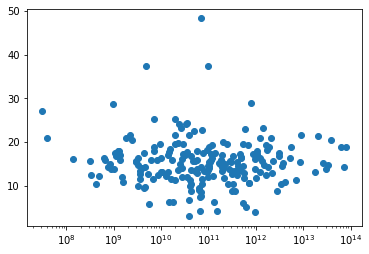

In [24]:
emissions_gm=emissions*1.e12/3.664 # emissions are in Mtonnes of CO_2; to get to grams, divide by this
intensity=emissions_gm/(energy*kwhour/1.e6) #gm/MJ
plt.scatter(energy,intensity)
plt.xscale('log')

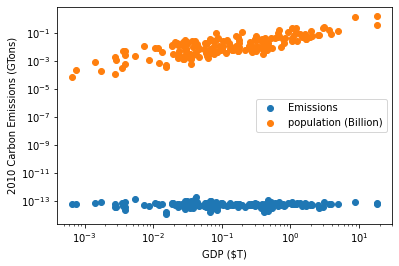

In [25]:
plt.scatter(gdp/1.e12,emissions/1.e3/3.664/energy,label='Emissions')
plt.xlabel('GDP ($T)')
plt.ylabel('2010 Carbon Emissions (GTons)')
plt.scatter(gdp/1.e12,population/1.e9,label='population (Billion)')
plt.yscale('log')
plt.xscale('log')
plt.legend()

258
164
(164, 2) (164,)
[ 1.13946022 -0.14546932] -3.2326820465392987
0.9292469964051995


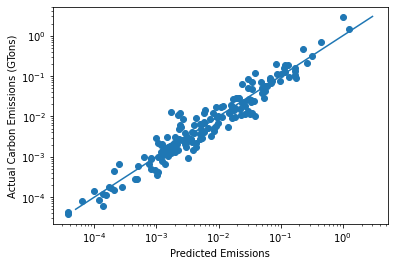

In [26]:
co22019=co2[co2['year']==2018]
co22019=co22019[co22019['country']!='World']
emissions=co22019['co2']
gdp=co22019['gdp']
population=co22019['population']
#Regression
from sklearn.linear_model import LinearRegression
lin_reg=LinearRegression()
## clean up nans
n=np.size(emissions)
print(n)
for i in gdp.index:
    if (np.isnan(gdp[i]) or np.isnan(emissions[i]) or np.isnan(population[i])): 
        del gdp[i]
        del emissions[i]
        del population[i]
n=np.size(emissions)
print(n)
emissions=emissions.values/1.e3/3.664
gdp=gdp.values/1.e12
population=population.values/1.e9
#gdp=gdp.reshape(-1,1)
#print(emissions)
#emissions=emissions.reshape(-1,1)
X=np.transpose([np.log(gdp),np.log(population)])
print(np.shape(X),np.shape(emissions))
lin_reg.fit(X,np.log(emissions))
print(lin_reg.coef_,lin_reg.intercept_)
x=np.arange(0,20,.0001)
#x.reshape(-1,1)
plt.scatter(np.exp(lin_reg.predict(X)),(emissions))#,label='2D Regression Fit')
#plt.scatter(gdp,emissions,label='Data')
plt.xlabel('Predicted Emissions')
plt.ylabel('Actual Carbon Emissions (GTons)')
plt.plot([5.e-5,3],[5.e-5,3])
#plt.axis([5.e-4,3,1.e-4,3])
plt.yscale('log')
plt.xscale('log')
print(lin_reg.score(X,np.log(emissions)))

If you extrapolate that fit to the world, which has a much higher population and GDP than any other point, what will happen? Well, maybe China is a good example: it has 1/7 of the population and the model tries to fit it but still under-predicts. So, likely for the world, the model will underpredict the actual emissions. And that is correct: the next box shows that the model predicts 6, while the data is 50% higher.

In [27]:
world=co2[co2['year']==2010]
world=world[world['country']=='World']
gdp=world['gdp'].values/1.e12
pop=world['population'].values/1.e9
emissions=world['co2'].values/3.664/1.e3
X=np.transpose([np.log(gdp),np.log(pop)])
print(np.exp(lin_reg.predict(X)))
print(emissions)

[5.00010525]
[9.09015502]


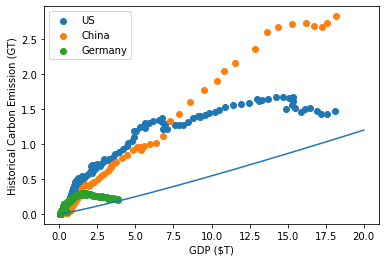

In [28]:
us=co2[co2['country']=='United States']
ugdp=us['gdp']/1.e12
uco2=us['co2']/1.e3/3.664
upop=us['population']/1.e9
plt.scatter(ugdp,uco2,label='US')

us=co2[co2['country']=='China']
ugdp=us['gdp']/1.e12
uco2=us['co2']/1.e3/3.664
plt.scatter(ugdp,uco2,label='China')

us=co2[co2['country']=='Germany']
ugdp=us['gdp']/1.e12
uco2=us['co2']/1.e3/3.664
plt.scatter(ugdp,uco2,label='Germany')

x=np.arange(.01,20,.001)
plt.xlabel('GDP ($T)')
plt.ylabel('Historical Carbon Emission (GT)')
plt.plot(x,np.exp(lin_reg.coef_[0]*np.log(x)+lin_reg.intercept_))
plt.legend()


Text(0.5, 1.0, 'United States')

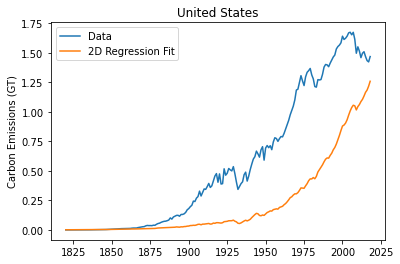

In [29]:
country='United States'
us=co2[co2['country']==country]
ugdp=us['gdp']/1.e12
uco2=us['co2']/1.e3/3.664
upop=us['population']/1.e9
yr=us['year']
for i in ugdp.index:
    if (np.isnan(ugdp[i]) or np.isnan(uco2[i]) or np.isnan(upop[i])): 
        del ugdp[i]
        del uco2[i]
        del upop[i]
        del yr[i]
plt.plot(yr,uco2,label='Data')
X=np.transpose([np.log(ugdp),np.log(upop)])
plt.plot(yr,np.exp(lin_reg.predict(X)),label='2D Regression Fit')
plt.legend()
plt.ylabel('Carbon Emissions (GT)')
plt.title(country)


Text(0.5, 1.0, 'China')

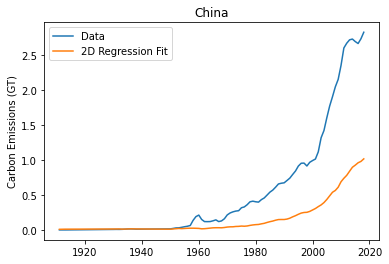

In [30]:
country='China'
us=co2[co2['country']==country]
ugdp=us['gdp']/1.e12
uco2=us['co2']/1.e3/3.664
upop=us['population']/1.e9
yr=us['year']
for i in ugdp.index:
    if (np.isnan(ugdp[i]) or np.isnan(uco2[i]) or np.isnan(upop[i])): 
        del ugdp[i]
        del uco2[i]
        del upop[i]
        del yr[i]
plt.plot(yr,uco2,label='Data')
X=np.transpose([np.log(ugdp),np.log(upop)])
plt.plot(yr,np.exp(lin_reg.predict(X)),label='2D Regression Fit')
plt.legend()
plt.ylabel('Carbon Emissions (GT)')

plt.title(country)

Text(0.5, 1.0, 'India')

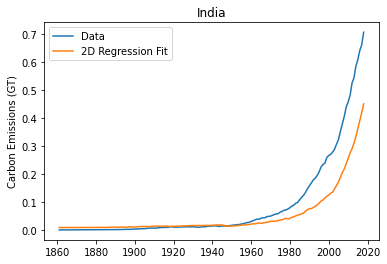

In [31]:
country='India'
us=co2[co2['country']==country]
ugdp=us['gdp']/1.e12
uco2=us['co2']/1.e3/3.664
upop=us['population']/1.e9
yr=us['year']
for i in ugdp.index:
    if (np.isnan(ugdp[i]) or np.isnan(uco2[i]) or np.isnan(upop[i])): 
        del ugdp[i]
        del uco2[i]
        del upop[i]
        del yr[i]
plt.plot(yr,uco2,label='Data')
X=np.transpose([np.log(ugdp),np.log(upop)])
plt.plot(yr,np.exp(lin_reg.predict(X)),label='2D Regression Fit')
plt.legend()
plt.ylabel('Carbon Emissions (GT)')

plt.title(country)

Text(0.5, 1.0, 'Israel')

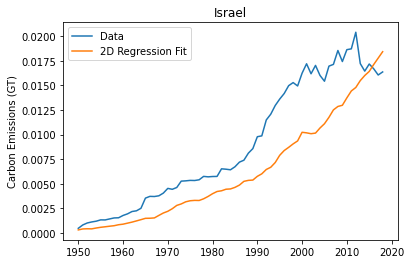

In [32]:
country='Israel'
us=co2[co2['country']==country]
ugdp=us['gdp']/1.e12
uco2=us['co2']/1.e3/3.664
upop=us['population']/1.e9
yr=us['year']
for i in ugdp.index:
    if (np.isnan(ugdp[i]) or np.isnan(uco2[i]) or np.isnan(upop[i])): 
        del ugdp[i]
        del uco2[i]
        del upop[i]
        del yr[i]
plt.plot(yr,uco2,label='Data')
X=np.transpose([np.log(ugdp),np.log(upop)])
plt.plot(yr,np.exp(lin_reg.predict(X)),label='2D Regression Fit')
plt.legend()
plt.ylabel('Carbon Emissions (GT)')
plt.title(country)

Text(0.5, 1.0, 'Japan')

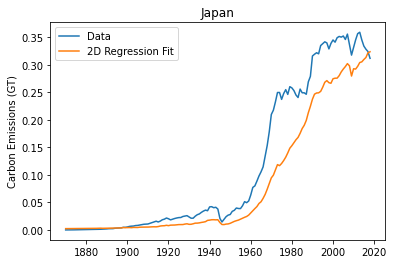

In [33]:
country='Japan'
us=co2[co2['country']==country]
ugdp=us['gdp']/1.e12
uco2=us['co2']/1.e3/3.664
upop=us['population']/1.e9
yr=us['year']
for i in ugdp.index:
    if (np.isnan(ugdp[i]) or np.isnan(uco2[i]) or np.isnan(upop[i])): 
        del ugdp[i]
        del uco2[i]
        del upop[i]
        del yr[i]
plt.plot(yr,uco2,label='Data')
X=np.transpose([np.log(ugdp),np.log(upop)])
plt.plot(yr,np.exp(lin_reg.predict(X)),label='2D Regression Fit')
plt.legend()
plt.ylabel('Carbon Emissions (GT)')
plt.title(country)

Text(0.5, 1.0, 'World')

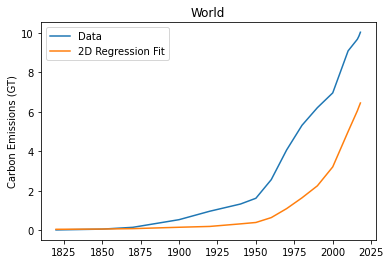

In [34]:
country='World'
us=co2[co2['country']==country]
ugdp=us['gdp']/1.e12
uco2=us['co2']/1.e3/3.664
upop=us['population']/1.e9
yr=us['year']
for i in ugdp.index:
    if (np.isnan(ugdp[i]) or np.isnan(uco2[i]) or np.isnan(upop[i])): 
        del ugdp[i]
        del uco2[i]
        del upop[i]
        del yr[i]
plt.plot(yr,uco2,label='Data')
X=np.transpose([np.log(ugdp),np.log(upop)])
plt.plot(yr,np.exp(lin_reg.predict(X)),label='2D Regression Fit')
plt.legend()
plt.ylabel('Carbon Emissions (GT)')
plt.title(country)

Text(0.5, 1.0, 'Indonesia')

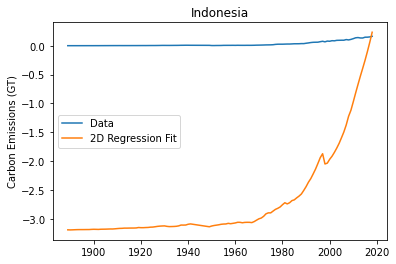

In [35]:
country='Indonesia'
us=co2[co2['country']==country]
ugdp=us['gdp']/1.e12
uco2=us['co2']/1.e3/3.664
upop=us['population']/1.e9
yr=us['year']
for i in ugdp.index:
    if (np.isnan(ugdp[i]) or np.isnan(uco2[i]) or np.isnan(upop[i])): 
        del ugdp[i]
        del uco2[i]
        del upop[i]
        del yr[i]
plt.plot(yr,uco2,label='Data')
X=np.transpose([ugdp,upop])
plt.plot(yr,lin_reg.predict(X),label='2D Regression Fit')
plt.legend()
plt.ylabel('Carbon Emissions (GT)')
plt.title(country)

Text(0, 0.5, 'Energy (EJ)')

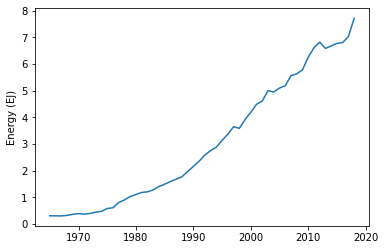

In [36]:
country='Indonesia'
us=co2[co2['country']==country]
ugdp=us['gdp']
energy=us['energy_per_gdp']# in kilowatt-hours/$
kwhour=1.e3*3600
yr=us['year']
plt.plot(yr,energy*ugdp*kwhour/1.e18)
plt.ylabel('Energy (EJ)')


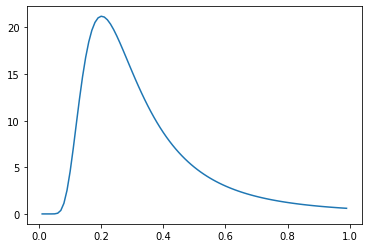

In [49]:
x=np.arange(.01,1,.01)
plt.plot(x,x**-5/(np.exp(1./x)-1))